# Modelagem do Risco
## 2. Variância Condicional

Imports de Bibliotecas Básicas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Modelos de variância condicional surgiram na literatura para levar em conta as características empíricas da volatilidade de retornos financeiros. Nos modelos econométricos convencionais, assume-se que a variância da série de preços é constante. No entanto, como visto no primeiro notebook desta série, a maior parte das séries temporais econômicas-financeiras exibem períodos de alta volatilidade seguidos por períodos de baixa volatilidade. Nessas circunstâncias, a suposição de variância constante ou **homocedasticidade** é inadequada. 

Como visto anteriormente no notebook 1, dados de retornos são estacionários e não correlacionados. No entanto os retornos *ao quadrado* tem correlação serial. Essa autocorrelação nos resíduos foram inicialmente modeladas por Engle (1982) com a introdução do modelo ARCH:
*AutoRegressive Conditional Heteroskedasticity*.


## ARCH - AutoRegressive Conditional Heteroskedasticity
---


A ideia central do modelo ARCH é que a variância do erro em um momento específico depende linearmente dos quadrados dos erros passados. Pelo fato de já termos observado as principais características dos retornos, muitos conceitos aqui descritos decorrerão naturalmente. A grande contribuição de Engle foi propor um modelo para volatilidade condicional que utiliza a volatilidade observada como parâmetro autoregressivo. Lembre-se que no caderno anterior definimos a variância dos retornos como $r_t^2$  tendo em vista que:

$$Var(r_t) = E(r_t - \bar{r}_t)^2$$
$$\Rightarrow E(r_t^2) - E(r_t)^2$$
$$\text{Como } E(r_t) = 0 $$
$$Var(r_t) = E(r_t^2)$$

Dado que sabemos que a variância não é constante no tempo, a estratégia proposta por Engle foi modelar a variância condicional como um processo autoregressivo AR(p) usando o *quadrado* dos retornos (ou resíduos, num contexto de regressão) como parâmetro autoregressivo. Dessa forma:

$$ 
\sigma_t^2 = \omega + \alpha_1 r_{t-1}^2 + \alpha_2 r_{t-2}^2 + ... + \alpha_q r_{t-p}^2 + \varepsilon_t
$$
Simplificando
$$
\sigma_t^2 = \omega + \sum_{i=0}^p \alpha_i r_{t-i}^2 + \varepsilon_t
$$

Onde $\varepsilon_t$ é um ruído branco i.i.d tal que sua média e variância sejam respectivamente 0,1 $\sim RB(0,1)$ e $r_t^2$ é a volatilidade observada no período t.

Na realidade, a especificação linear acima não é a mais adequada, dada que a estimação do modelo é feita por máxima verossimilhança. Neste contexto, uma das grandes observações de Engle foi propor o modelo num formato multiplicativo, retirando o termo estocástico da equação acima e adicionando um fator multiplicativo no próprio processo gerador dos retornos subjascente. Por isso, podemos definir o processo gerador dos retornos como:

$$ r_t = \varepsilon_t \sigma_t$$
$$\text{onde}$$
$$\sigma_t^2 = \omega + \sum_{i=0}^p \alpha_i r_{t-i}^2$$


#### Propriedades ARCH(1)

##### Valor Esperado

Vimos na parte anterior que tratou dos fatos estilizados dos retornos que o valor esperado dos retornos ($r_t$) é 0. Como nós agora temos um processo gerador subjascente para os retornos e sabemos que por definição $\varepsilon_t \sim RB(0,1)$. Sendo $I_t$ a informação que chega ao mercado, sabendo que $E(\varepsilon_t)=0$, a esperança de $r_t$ é então definida por:

$$E(r_t | I_t) = E(\varepsilon_t \sigma_t)=  E(\varepsilon_t) \sigma_t = 0$$

Note que neste caso $\sigma_t$ é um termo determinístico e por isso não recebe o operador de esperança. Adicionalmente, pela **lei das expectativas iteradas**, sabemos que tanto a média condicional como não condicional serão iguais a 0 $\rightarrow E[E(r_t | I_t)] = 0 $.

##### Autocorrelação

Adicionalmente, como $E(\varepsilon_t \varepsilon_{t-1}) = 0 $, decorre imediatamente que:

$$ E(r_t r_{t-i}) = E[E(r_t r_{t−i}|I_t)] $$
$$ = E[r_{t-i} E(r_t|I_t)] $$
$$ = E[r_{t-i} * 0] = 0 $$
$$\quad i\neq 0$$


### Variância

A seguir, seguirão as derivações da variância condicional e não condicional do modelo: Lembre-se que o nosso interesse é modelar a variância condicional do processo gerador retornos. Variância não condicional se trata da média estacionária do modelo e é **diferente** da variância amostral do modelo.

Para fins de simplificação, considere um modelo ARCH(1) tal que:

$$r_t = \varepsilon_t \sigma_t$$
$$\sigma_t^2 = \omega + \alpha r_{t-1}^2$$

#####  Variância Condicional

Sendo $I_t$ a informação que chega ao mercado (ou simplesmente $r_{t-1}, r_{t-2},..., r_{t-q}$). Sabendo que a média ou valor esperado de $r_t$ é zero, define-se a variância condicional como:
$$Var(r_t | I_t) =E(r_t^2)$$
$$Var(r_t | I_t) =E((\varepsilon_t\sigma_t)^2) = E(\varepsilon_t^2 \sigma_t^2)$$
$$Var(r_t | I_t) = E(\varepsilon_t^2)  \sigma_t^2$$
$$Var(r_t | I_t) = \sigma_t^2\\$$
$$Var(r_t | I_t) = \sigma_t^2 = \omega + \alpha r_{t-1}^2\\$$


##### Variância Não Condicional 

Utilizando a lei das expectativas iteradas, podemos definir a variância não condicional do modelo da seguinte forma:
$$Var(r_t) = E(E(r_t^2)) $$
$$\Rightarrow E[E(\varepsilon_t^2) \sigma_t^2] = E(\sigma_t^2)$$
$$\Rightarrow E(\sigma_t^2) = E(\omega + \alpha r_{t-1}^2)$$
$$\Rightarrow E(\sigma_t^2) = \omega + \alpha E(r_{t-1}^2)$$

Supondo que $E(r_{t-1}^2) = E(\sigma^2_{t-1})$ e que o processo  gerador começou infinitamente no passado com uma variância inicial finita, a sequência das variâncias converge para uma constante, neste caso $\bar{\sigma}^2$

$$\Rightarrow \bar{\sigma}^2 =\omega + \alpha \bar{\sigma}^2$$
$$\bar{\sigma}^2 = \frac{\omega}{(1-\alpha)}$$




Diferentemente de um modelo AR(p) tradicional, os valores dos coeficientes $\omega$ e $\alpha$ precisam ser limitados. Para assegurar que a variância condicional nunca seja negativa (Não é possível que haja variância negativa), é necessário assumir que ambos os valores serão positivos. Essas restrições são chamadas de **condições de positividade**.

Caso $\omega$ seja negativo, uma perturbação suficientemente pequena em $r_{t−1}$ pode fazer com que variância condicional seja negativa. Da mesma forma, $\alpha$ for negativo, uma perturbação suficientemente grande em $r_{t−1}$ pode resultar em uma variância condicional negativa. Além disso, para manter a estabilidade do processo, ou seja, para que o processo seja convergente e estacionário $\alpha$ precisa ser limitado a $0 \leq \alpha < 1$.

Por fim, um aspecto crucial é que os retornos **não são independentes**, pois apesar de não correlacionados em nível, estão ligados pelo segundo momento (lembrando que correlação é uma relação linear). Assim sendo, a própria variância condicional segue um padrão autoregressivo.

#### Simulando Processos ARCH

Com as relações que desenvolvemos acima, é simples simularmos um processo ARCH. É interessante observarmos que, de fato, estamos simulando um processo de retornos financeiros. Neste exemplo, simularemos um processo ARCH(1), com 1000 observações (`n`) simuladas, definindo `e_t` como um processo ruído branco com média 0 e variância 1; `omega` = 1 e `alpha_1` = 0.8.

In [2]:
n = 1000
omega = 1
alpha_1 = .8
e_t = np.random.normal(size=n, loc=0, scale=1)

Como o processo gerador é dado por:

$$ r_t = \varepsilon_t\sigma_t $$

Como:

$$\sigma_t^2 = \omega + \alpha r_{t-1}^2$$
$$\Rightarrow \sigma_t = \sqrt{\omega + \alpha r_{t-1}^2}$$

Podemos reescrever a fórmula acima da seguinte forma:

$$ r_t = \varepsilon_t \sqrt{\omega + \alpha r_{t-1}^2}$$

Utilizando a equação acima, somos capazes de gerar um processo ARCH(1). Supondo que $r_0$ = 0, podemos escrever o loop abaixo:

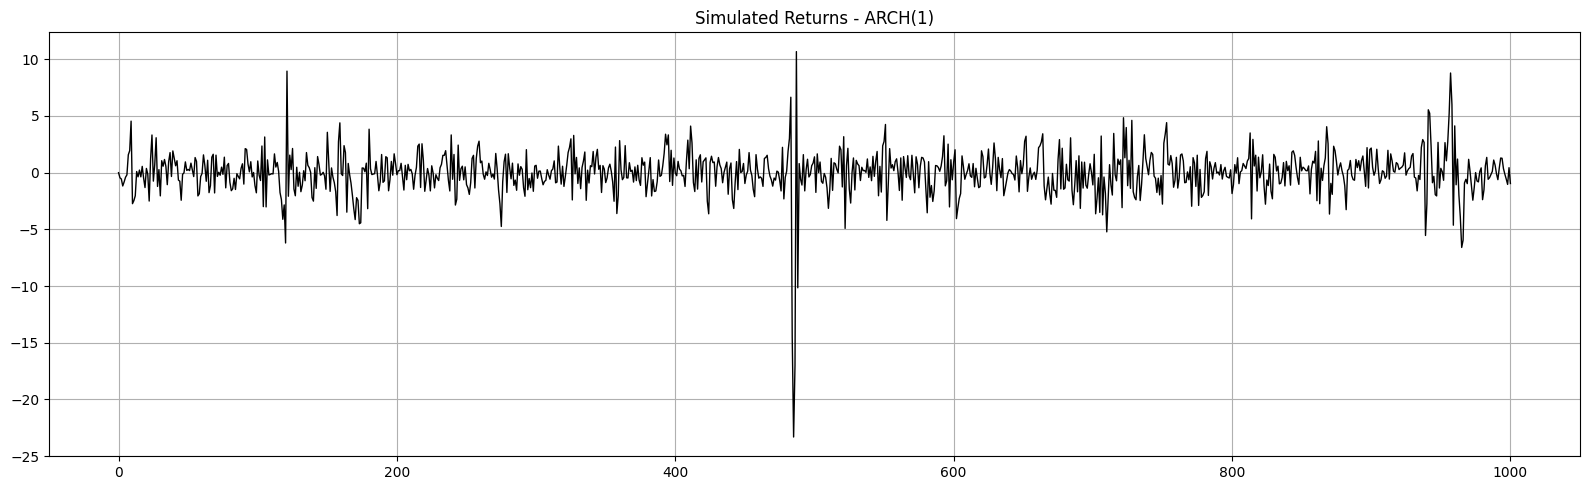

In [3]:
# Primeira obs (r_t) = 0
r_sim = [0]

# ARCH Process
for i in range(n):
    
    r_t = e_t[i]*np.sqrt(omega + alpha_1 * r_sim[i]**2)
    r_sim.append(r_t)

# Plot Simulated Returns - ARCH Process
plt.figure(figsize=(16, 5))
plt.plot(r_sim, c='k', lw=1)
plt.grid(True)
plt.title("Simulated Returns - ARCH(1)")
plt.tight_layout()

#### Utilizando o a biblioteca `arch`

Agora que temos um processo gerador dos retornos simulado, podemos estimar um modelo ARCH. Neste caso, a biblioteca em python que nos permite estimar modelos de volatilidade condicional é a biblioteca `arch`. Sua utilização é bem similar a biblioteca `statsmodels` para modelos de regressão e séries temporais. Abaixo, podemos ver como se estima o modelo e os coeficientes obtidos.

In [4]:
from arch.univariate import arch_model

model_arch = arch_model(r_sim, mean='Zero', vol='ARCH', p=1)
res_arch = model_arch.fit(disp='off')
res_arch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1815.55
Distribution:                  Normal   AIC:                           3635.10
Method:            Maximum Likelihood   BIC:                           3644.92
                                        No. Observations:                 1001
Date:                Wed, Jun 19 2024   Df Residuals:                     1001
Time:                        18:52:11   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.0656  8.838e-02     12.057  1.773e-33 [  0.892,  1.239]
alpha[1]       0.7148  7.278e-02      9.821  9.108e-23 [  0.572,  0.858]
========================================================================

Covariance estimator: robust
"""

Note que houve uma boa aproximação do modelo estimado em relação aos parâmetros definidos pelo processo gerador (`omega` = 1 e `alpha_1` = 0.8.). Fica como sugestão ao leitor, reestimar o modelo utilizando mais lags (defasagens) para o modelo. 

Text(0.5, 1.0, 'Volatilidade Observada vs Estimada')

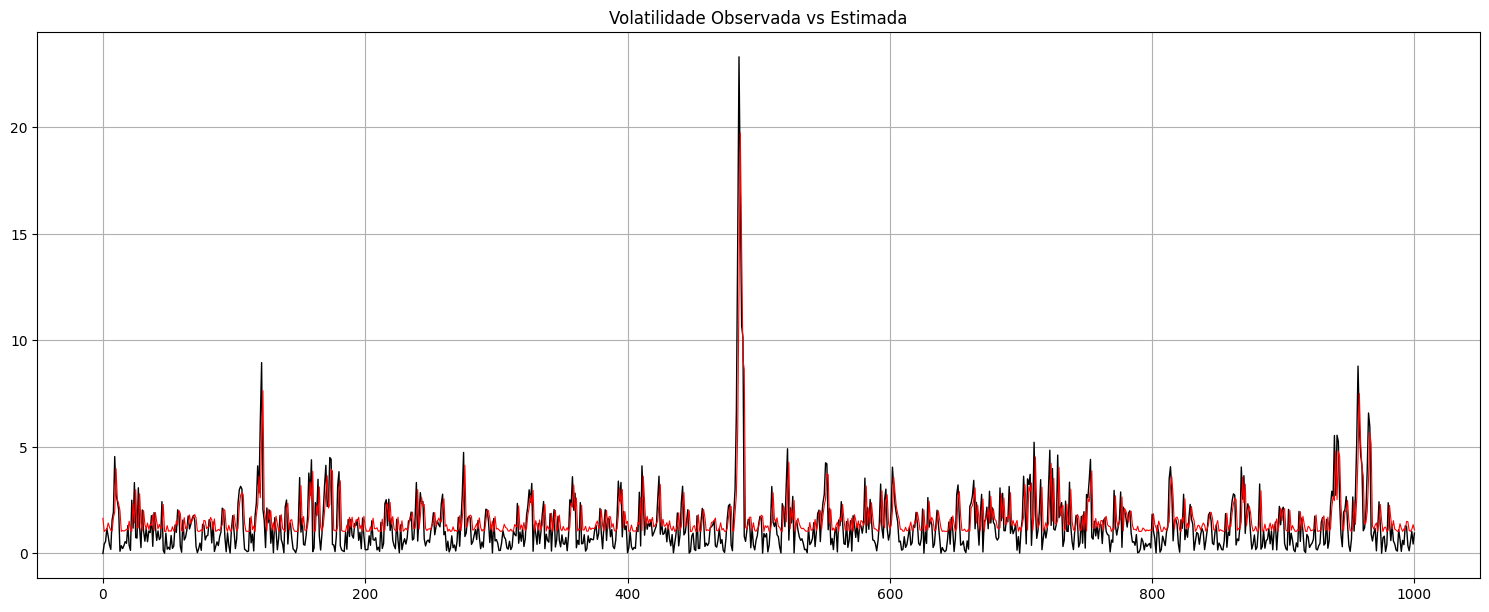

In [5]:
plt.figure(figsize=(15, 6))
plt.plot([abs(r_t) for r_t in r_sim], c='k', lw=1)
plt.grid(True)
plt.tight_layout()

plt.plot(res_arch.conditional_volatility,c= 'red', lw=.8)

plt.title('Volatilidade Observada vs Estimada')

## GARCH - Generalized AutoRegressive Conditional Heteroskedasticity
---

O modelo GARCH (Generalized Autoregressive Conditional Heteroskedasticity) foi introduzido por Tim Bollerslev em 1986 como uma generalização do modelo ARCH tradicional. Em muitos casos, para obter um bom ajuste do modelo ARCH para um conjunto de dados é necessário um grande número de defasagens ($p$). Para contornar este problema, Bollerslev sugeriu modelar a variância condicional como um processo ARMA. 

O conceito chave do modelo GARCH é que ele permite tanto componentes autorregressivos (AR), quanto de médias móveis (MA) na variância heterocedástica. O modelo GARCH($p,q$) é definido da seguinte forma:

$$ r_t = \varepsilon_t \sigma_t$$
$$ \sigma_t^2 = \omega + \sum_i^p \beta_i \sigma^2_{t-i} + \sum_i^q \alpha_i r^2_{t-i} $$ 

Note que neste modelo, adicionamos os coeficientes $\beta_i$ que multiplicam a própria variância condicional defasada referente ao número de defasagens definidas pelo parâmetro autoregressivo $p$. Note também que os coeficientes $\alpha_i$ que multiplicam o quadrado dos retornos defasados agora são indexados pelo parâmetro $q$. É de interesse do leitor notar que se definirmos $p = 0$ e $q = 1$, fica claro que o modelo GARCH(0, 1) é simplesmente o modelo ARCH de primeira ordem que definimos anteriormente. Da mesma forma, se todos os valores $\beta_i$ forem iguais a zero, o modelo GARCH(p, q) se torna equivalente a um modelo ARCH(q).

As vantagens do modelo GARCH são evidentes; um modelo ARCH de ordem muiito alta pode ser representado de maneira mais parcimoniosa através de um modelo GARCH, o que facilita sua identificação e estimativa, isso pois um modelo mais parcimonioso implicará em menos restrições de coeficientes.

Normalmente, o modelo GARCH(1,1), com apenas três parâmetros na equação da variância condicional, é adequado para obter um bom ajuste ao modelo para retornos diários de ativos. Portanto, para muitos propósitos, o modelo GARCH(1,1) é o modelo de volatilidade padrão de escolha para retornos. Como tal, vale a pena prestar atenção especial a esta forma de processo GARCH.

Tomemos por base um modelo GARCH(1,1):

$$r_t = \varepsilon_t \sigma_t$$

$$ \sigma^2_t = \omega + \beta\sigma^2_{t-1} + \alpha r^2_t$$

$$\varepsilon_t \sim i.i.d \ N(0,1) $$

#### Propriedades GARCH(1,1)

##### Valor Esperado:

Assim como no modelo ARCH(p), dado que $\varepsilon_t$ é independente de $\sigma_t$ e que $E(\varepsilon_t)=0$, é simples perceber que:

$$E(r_t|I_t) = E(\varepsilon_t\sigma_t) = 0$$

##### Autocorrelação:

Da mesma forma que o valor esperado, como $E(r_t) = 0$:

$$ E(r_t r_{t-i}) = E[E(r_t r_{t−i}|I_t)] $$
$$ = E[r_{t-i} E(r_t|I_t)] $$
$$ = E[r_{t-i} * 0] = 0 $$
$$\quad i\neq 0$$


##### Variância Condicional

A derivação da variância condicional segue abaixo:

$$Var(r_t | I_t)  = E(\varepsilon_t^2\sigma_t^2)$$
$$Var(r_t | I_t) = E(\varepsilon_t^2)  \sigma_t^2$$
$$Var(r_t | I_t) = \sigma_t^2$$
$$Var(r_t | I_t) = \omega + \beta\sigma_{t-1}^2 + \alpha r_{t-1}^2 $$

O resultado é a essência da moedelagem GARCH.

##### Variância Não Condicional

Utilizando a Lei das Expectativas Iteradas, podemos derivar a variância não condicional do modelo

$$Var(r_t) = E(\sigma_t^2) = E(\omega + \beta\sigma_{t-1}^2 + \alpha r_{t-1}^2) $$
$$Var(r_t) = \omega + \beta E(\sigma_{t-1}^2) + \alpha E(r_{t-1}^2) $$

Como $E(r_{t-1}^2) = E(\sigma_{t-1}^2)$ e a variância não condicional é invariante no tempo (uma constante), sendo $\bar{\sigma}^2$ o valor esperado da variância não condicional, podemos escrever que:

$$Var(r_t) = E(\sigma_t^2) $$
$$\Rightarrow \bar{\sigma}^2 = \omega + \beta \bar{\sigma}^2 + \alpha \bar{\sigma}^2 $$
$$\Rightarrow  \omega = \bar{\sigma}^2  + (\alpha+\beta)\bar{\sigma}^2$$
$$Var(r_t) = \frac{\omega}{1-\alpha -\beta}$$

Note que para que a variância seja finita e positiva, é necessário que

 - $\alpha > 0$
 - $\beta \geq 0$
 - $\alpha + \beta < 1$


Um ponto notável na interpretação dos coeficientes é perceber que valores grandes de $\alpha$ e $\beta$ atuam para aumentar a volatilidade condicional, mas o fazem de maneiras diferentes. Quanto maior for $\alpha$, maior é a resposta de $r_t^2$ a novas informações; claramente, se $\alpha$ for grande, um choque $\varepsilon_t$ tem um efeito considerável em $\sigma_t^2$ e $r_{t+1}$. Neste caso, um $\alpha$ maior resulta em respostas mais pronunciadas a choques, enquanto um $\beta$ maior aumenta a persistência autorregressiva da variância condicional. 

#### Aplicação GARCH - Retornos IBOV

Faremos uma aplicação básica do modelo GARCH na análise dos retornos do IBOV desde 2001, abaixo apresento os comandos em python

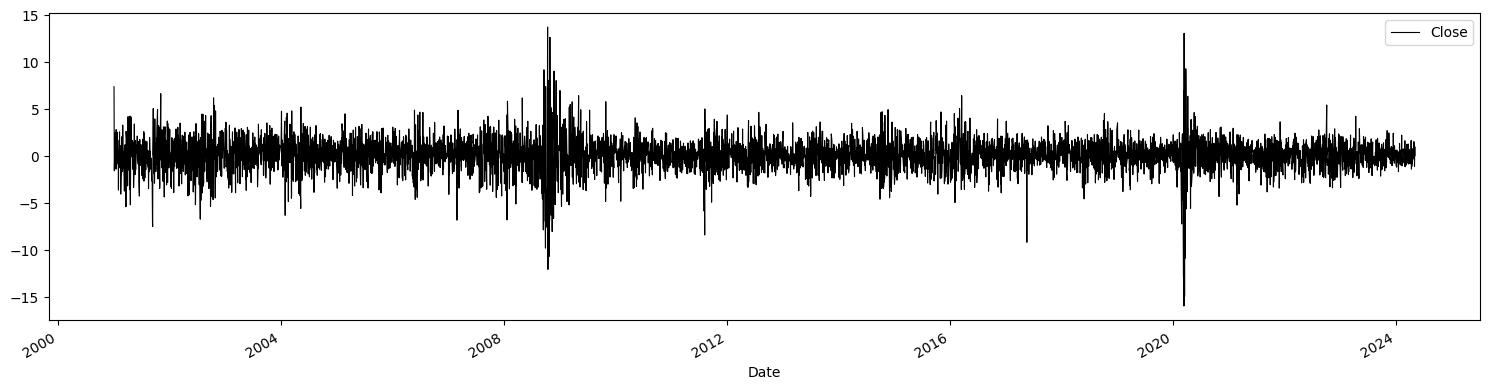

In [21]:
df_ibov = pd.read_excel('Data\Ibov.xlsx', index_col=0) #Lê o Arquivo
df_ibov = df_ibov['2001':]

df_ret_ibov = np.log(df_ibov).diff().dropna()*100
df_ret_ibov.plot(figsize=(15,4), lw=.8, c='k')
plt.tight_layout()

Dinâmica de volatilidade da série:

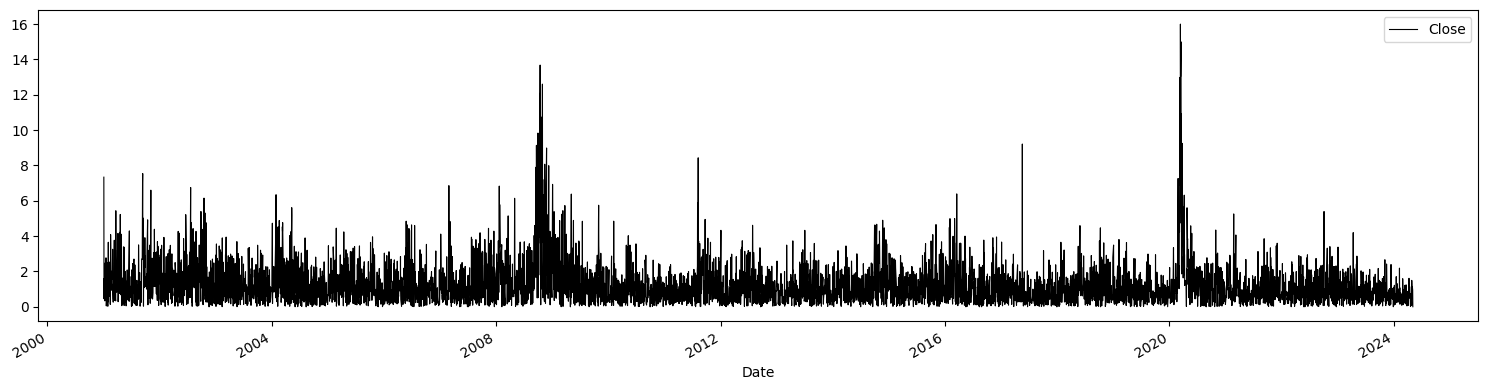

In [22]:
abs(df_ret_ibov).plot(figsize=(15,4), lw=.8, c='k')
plt.tight_layout()

In [26]:
from arch.univariate import arch_model

model_garch = arch_model(df_ret_ibov, mean='Zero', vol='GARCH', p=1, q=1)
model_garch = model_garch.fit(disp='off')
model_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10660.8
Distribution:                  Normal   AIC:                           21327.6
Method:            Maximum Likelihood   BIC:                           21347.5
                                        No. Observations:                 5776
Date:                Wed, Jun 19 2024   Df Residuals:                     5776
Time:                        19:00:09   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0552  1.244e-02      4.436  9.157e-06 [3.079e-02,7.954e-02]
alpha[1]       0.0724  8.814e-03      8.219  2.047e-16 [5.517e-02,8.972e-02]
beta[1]        0.9069  1.097e-02     82.695      0.000     [  0.885,  0.928]
============================================================================

Covariance estimator: robust
"""

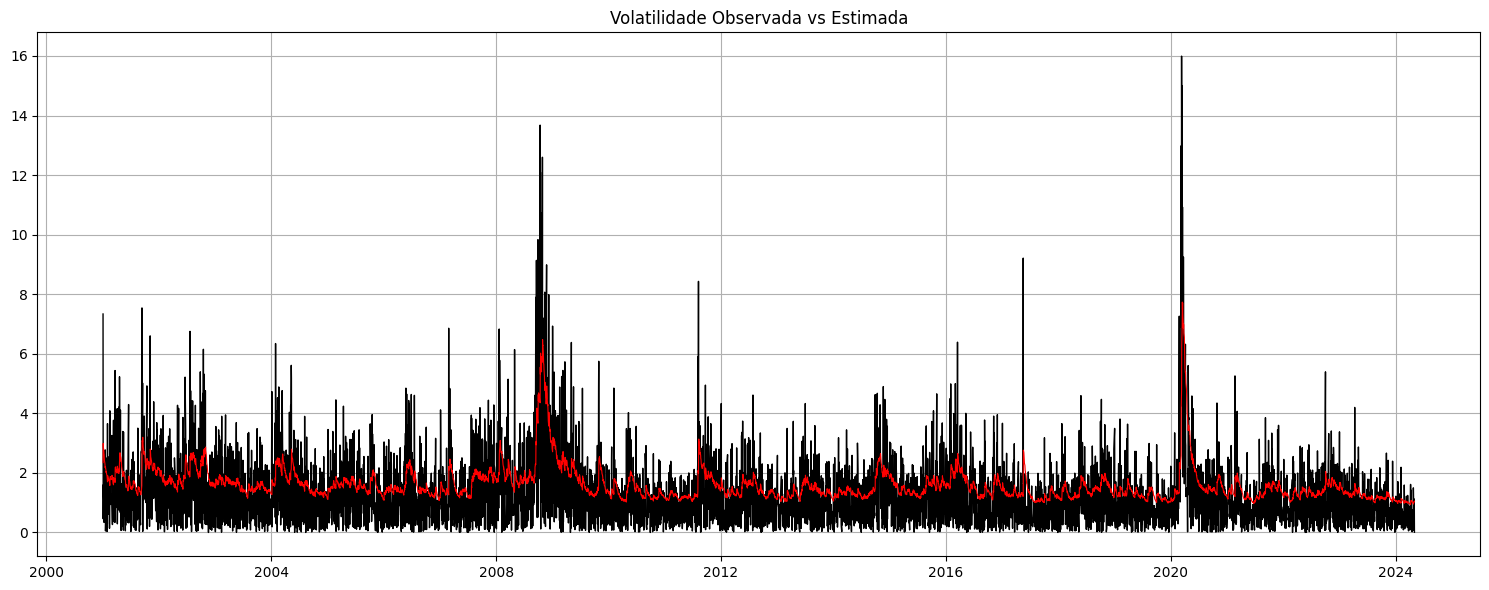

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(abs(df_ret_ibov), c='k', lw=1)
plt.plot(model_garch.conditional_volatility,c= 'red', lw=.8)
plt.title('Volatilidade Observada vs Estimada')

plt.grid(True)
plt.tight_layout()


### Análises de Diagnóstico 


retorno normalizado deverá ser !!!independente!!!!

### Família GARCH - Especificações Alternativas 

GARCH in Mean - Estrutura de volatilidade na média do processo gerador.

GJR GARCH/TARCH - Perdas tem um fator de aumentar a volatilidade mais que ganhos (efeito alavancagem).

IGARCH - GARCH Integrado alpha + beta proxima de 1 - série muito persistente

EGARCH - Modelar a log variancia, garante as condições de positividade.

VARIANCE TARGET - Restringe a estimação para que a variancia nao condicional seja a mesma que a variancia amostral. (Diminui a parametrização do modelo)

APGARCH - Restringe a estimação para que o retorno normalizado tenha necessariamente uma dist. normal 

SPLINEGARCH - Variancia nao condicional nao é constante, mas evolui de forma suave. Tendencia na variancia nao condicional. Spline (segunda variável pequena)

FIGARCH - $r_t^2$ segue um processo ARFIMA(p,d,q).

#### Referências 

BOLLERSLEV, T. Generalized autoregressive conditional heteroskedasticity. Journal of Econometrics, Vol. 31, p. 307-327, 1986.

BUENO, R. L. S. Econometria de Séries Temporais. São Paulo: Cengage Learning, 2011. Cap. 8.

ENDERS, W. Applied Econometric Time Series. 4th Edition. Hoboken, NJ: John Wiley & Sons, 2015. Cap. 3.

ENGLE, R. F. Autoregressive conditional heteroskedasticity with estimates of the variance of U.K. inflation. Econometrica, Vol. 50, p. 987-1008, 1982.

MORETTIN, P. A. Econometria Financeira. Um curso em séries temporais financeiras. 3 Ed. São Paulo: Edgard Blucher, 2017. Cap. 5.